# Esercizio di Machine Learning

Questo esercizio è tratto dal libro di MacKay.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib import colors
from matplotlib.ticker import PercentFormatter

No Bottleneck unit testing available.


In [2]:
genCas = np.random.default_rng()

In [3]:
def esperimento(monete=1000,lanci=10):
    
    c = genCas.integers(low=0,high=2,size=(monete,lanci))
    n_rand = genCas.integers(0,1000,1)[0]

    h = np.zeros(1000)

    for i in range(1000):
        h[i] = c[i].sum()

        
    return([h[1]/10,h[n_rand]/10,h.min()/10])

In [4]:
def ripeti_esperimento(num=100000):

    nu_1 = []
    nu_rand = []
    nu_min = []

    for i in range(num):
        [a,b,c] = esperimento()
        nu_1.append(a)
        nu_rand.append(b)
        nu_min.append(c)
    
    df = pd.DataFrame({'nu_1': nu_1,'nu_rand': nu_rand, 'nu_min': nu_min})
    return(df)


In [5]:
df = ripeti_esperimento()

KeyboardInterrupt: 

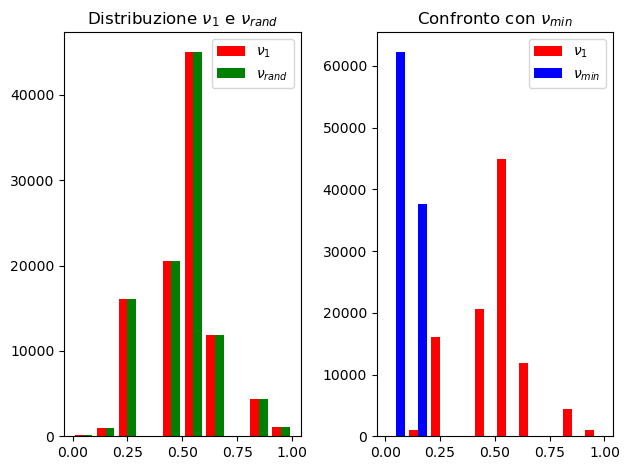

In [138]:
fig, (ax0,ax1) = plt.subplots(1,2,tight_layout=True)

n_bins = 10
colors_1 = ['red', 'green']
N, bins, patches = ax0.hist(df[['nu_1','nu_rand']], bins=n_bins, density=False, histtype='bar', color=colors_1, label=[r'$\nu_1$',r'$\nu_{rand}$'])
ax0.legend(prop={'size': 10})
ax0.set_title(r'Distribuzione $\nu_1$ e $\nu_{rand}$');

colors_2 = ['red', 'blue']
ax1.hist(df[['nu_1','nu_min']], bins=n_bins, density=False, histtype='bar', color=colors_2, label=[r'$\nu_1$',r'$\nu_{min}$'])
ax1.legend(prop={'size': 10})
ax1.set_title(r'Confronto con $\nu_{min}$');

In [139]:
mu = 0.5

In [151]:
df['nu_1'].mean()

0.500682

In [166]:
x = np.linspace(0,1,11)

In [159]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [177]:
y1 = df.groupby('nu_1')['nu_1'].count()
y2 = df.groupby('nu_rand')['nu_rand'].count()
y3 = df.groupby('nu_min')['nu_min'].count()

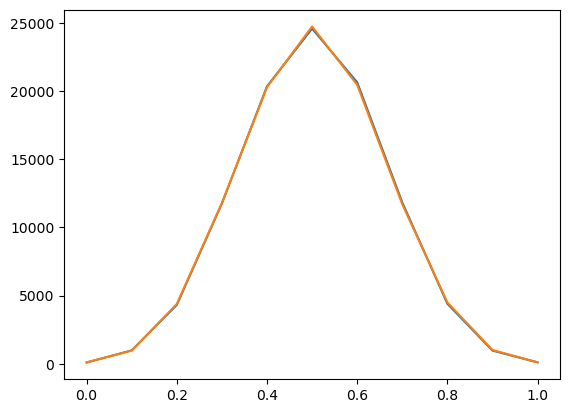

In [209]:
plt.plot(x,y1,y2);

In [193]:
def calcola_P(mu=0.5,eps=0.1):

    s = 0
    num = 100000

    for i in range(len(df['nu_1'])):
        if (abs(df['nu_1'][i]-mu) > eps):
            s = s + 1
        
    return(s/num)


In [206]:
toll = np.linspace(0.1,0.5,5)
n_train = 10
p_scarti = []
hoeff = []

for eps in toll:
    p = calcola_P(eps=eps) 
    p_scarti.append(p)
    q = 2 * np.e **(-2*(eps**2)*n_train)
    hoeff.append(q)

In [207]:
p_scarti

[0.34445, 0.10856, 0.02142, 0.00196, 0.0]

In [208]:
hoeff

[1.6374615061559636,
 0.8986579282344431,
 0.33059777644317295,
 0.0815244079567324,
 0.013475893998170937]

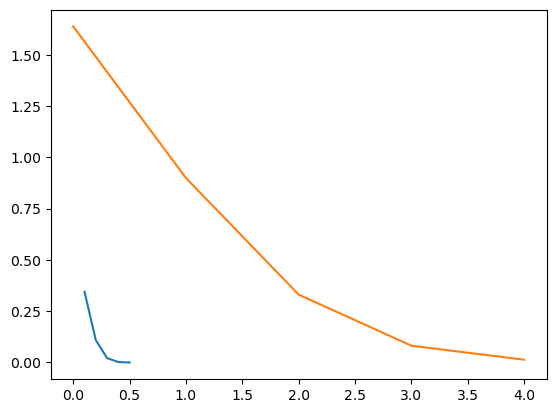

In [210]:
plt.plot(toll,p_scarti,hoeff);

In [213]:
x_1 = np.linspace(0,1,1000)

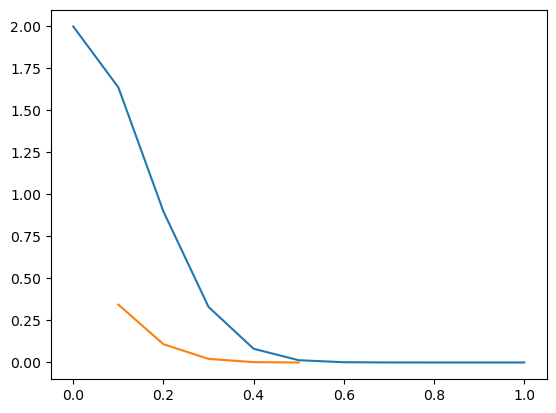

In [218]:
plt.plot(x,2 * np.e **(-2*(x**2)*n_train));
plt.plot(np.linspace(0.1,0.5,5),p_scarti)